#### cnn 알고리즘에서 이미지가 filter, relu, pooling를 거치는 과정을 확인하자 ####

(437, 632, 3)


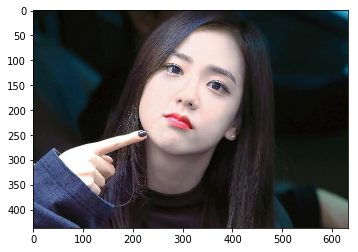

In [66]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

test = cv2.imread('test.png')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
#test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
print(test.shape)
plt.imshow(test)


### 3x3 Kernel Conv를 거쳤을 때

In [98]:
print(test.shape)

model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))

(437, 632, 3)


C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  import sys


In [99]:
test_batch = np.expand_dims(test,axis=0)

# here we get rid of that added dimension and plot the image
def visualize_test(model, test):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    test_batch = np.expand_dims(test,axis=0)
    conv_test = model.predict(test_batch)
    print(conv_test.shape)
    conv_test = np.squeeze(conv_test, axis=0)
    conv_test = cv2.cvtColor(conv_test, cv2.COLOR_BGR2GRAY) #형태를 보기 좋게 흑백으로 출력
    print (conv_test.shape)
    plt.imshow(conv_test,cmap='gray')#,cmap='gray'

(1, 435, 630, 3)
(435, 630)


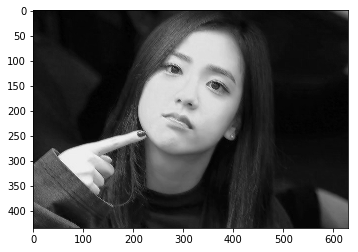

In [100]:
visualize_test(model, test)

### 10x10 Kernel Conv를 거쳤을 때

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (10, 10), input_shape=(437, 632,...)`
  """


(1, 428, 623, 3)
(428, 623)


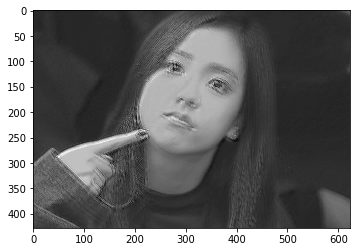

In [101]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        10,    # y dimension of kernel (we're going for a 3x3 kernel)
                        10,    # x dimension of kernel
                        input_shape=test.shape))


visualize_test(model, test)

### 하나의 필터를 거쳤을 때

In [102]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_test_printer(model, test):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(test,axis=0)
    conv_test2 = model.predict(test_batch)

    conv_test2 = np.squeeze(conv_test2, axis=0)
    print(conv_test2.shape)
    conv_test2 = conv_test2.reshape(conv_test2.shape[:2])

    print(conv_test2.shape)
    plt.imshow(conv_test2, cmap='gray')

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  """


(435, 630, 1)
(435, 630)


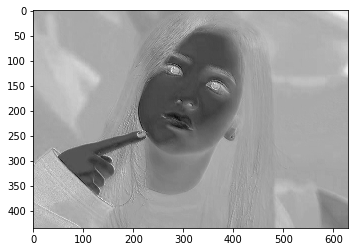

In [103]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_test_printer(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (15, 15), input_shape=(437, 632,...)`
  


(423, 618, 1)
(423, 618)


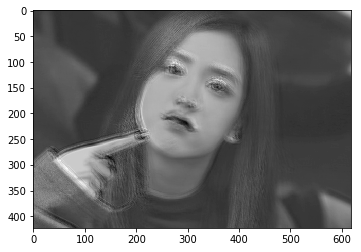

In [104]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        15,    # y dimension of kernel (we're going for a 3x3 kernel)
                        15,    # x dimension of kernel
                        input_shape=test.shape))

nice_test_printer(model, test)

### relu activation 추가

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  """


(435, 630, 1)
(435, 630)


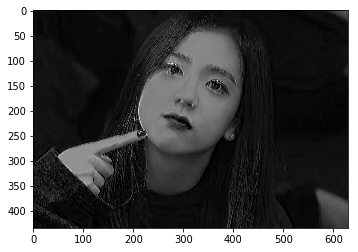

In [105]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_test_printer(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  """


(1, 435, 630, 3)
(435, 630)


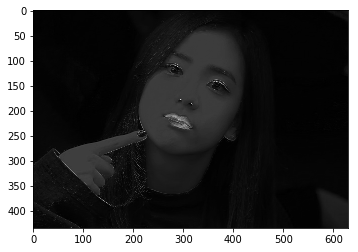

In [106]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_test(model, test)

### Max Pooling 추가

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  """


(1, 87, 126, 3)
(87, 126)


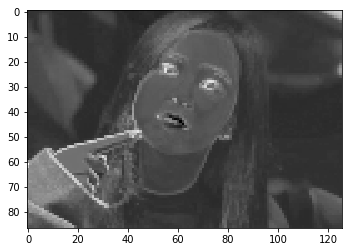

In [107]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_cat_printer(model, cat)
visualize_test(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  """


(87, 126, 1)
(87, 126)


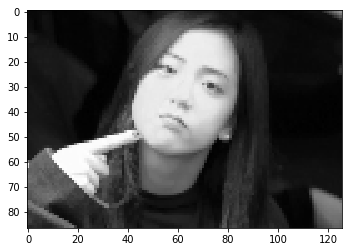

In [109]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_test_printer(model, test)

### relu + pooling 추가

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  """


(87, 126, 1)
(87, 126)


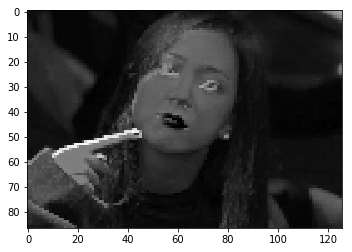

In [112]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_test_printer(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  """


(1, 87, 126, 3)
(87, 126)


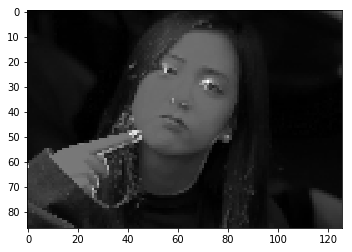

In [115]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_test(model, test)

### conv + relu + pooling + conv +relu + pooling

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  
C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  del sys.path[0]


(47, 69, 1)
(47, 69)


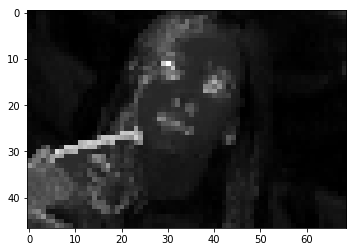

In [117]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_test_printer(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  
C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(437, 632,...)`
  del sys.path[0]


(71, 104, 1)
(71, 104)


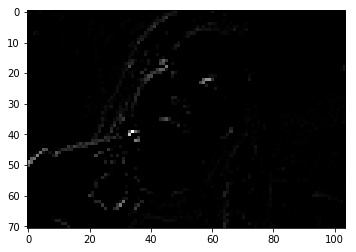

In [118]:
# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_test_printer(model, test)

C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  
C:\Users\pc\Anaconda3\envs\zz\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(437, 632,...)`
  del sys.path[0]


(1, 71, 104, 3)
(71, 104)


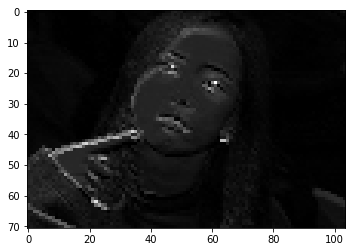

In [119]:
# 3 filters in both conv layers
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=test.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_test(model, test)

### 이미지 비교

(437, 632, 3)


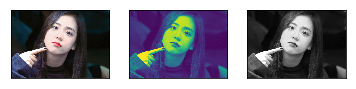

In [120]:
import cv2

import matplotlib.pyplot as plt

img = cv2.imread("test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1) # 1행 2열에서 1번째 열

print(img.shape)
plt.imshow(img)
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 3, 2) # 1행 2열에서 2번째 열
plt.imshow(img)
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김

plt.subplot(1, 3, 3) # 1행 2열에서 2번째 열
plt.imshow(img, cmap='gray')
plt.xticks([]) # x축 좌표 숨김
plt.yticks([]) # y축 좌표 숨김

plt.show()

